In [231]:
import pandas as pd

In [258]:
df = pd.read_csv('../datasets/data.csv')

In [261]:
df.drop("Market Category", axis=1, inplace=True)

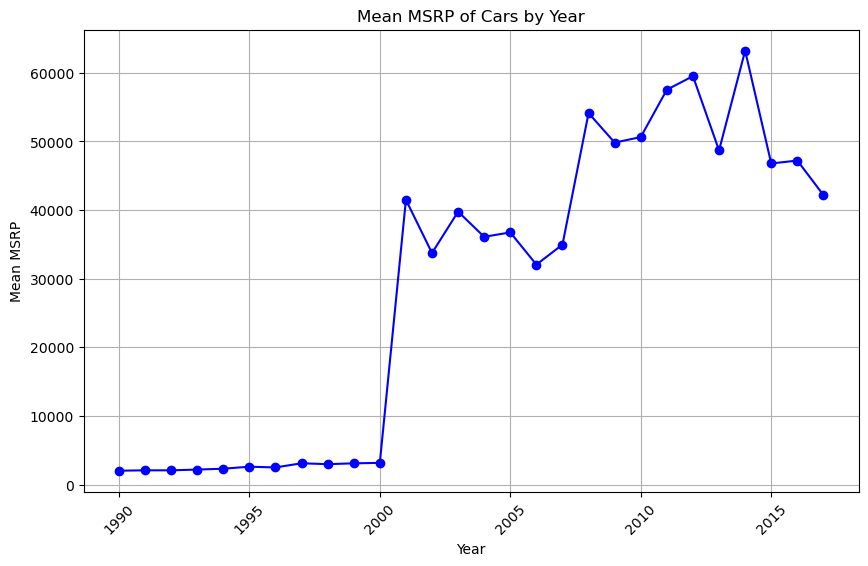

In [237]:
yearly_msrp_mean = df.groupby('Year')['MSRP'].mean()


# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(yearly_msrp_mean.index, yearly_msrp_mean.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Mean MSRP')
plt.title('Mean MSRP of Cars by Year')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

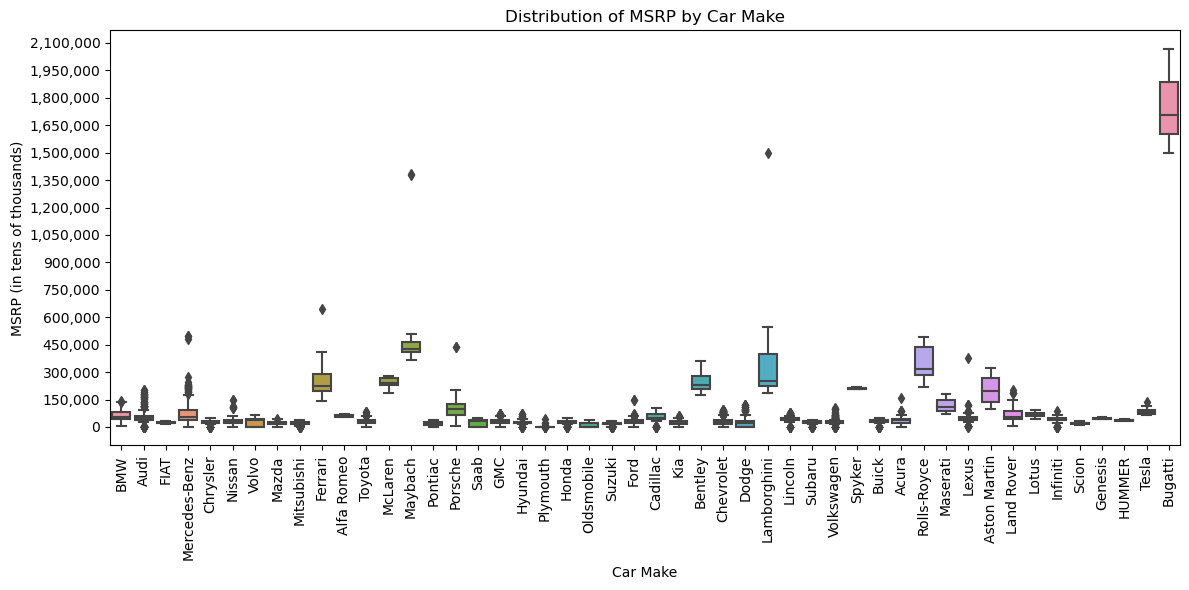

In [207]:
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Create a single figure and subplot
plt.figure(figsize=(12, 6))

# Plot a box plot for all car makes
sns.boxplot(data=df, x='Make', y='MSRP')
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('MSRP (in tens of thousands)')
plt.title('Distribution of MSRP by Car Make')

# Set the y-axis tick interval to make labels more granular
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(base=150000))  # Adjust the base value as needed
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [208]:
make_gb = df.groupby(['Make', 'MSRP'])

In [209]:
df.isna().sum()



Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [210]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

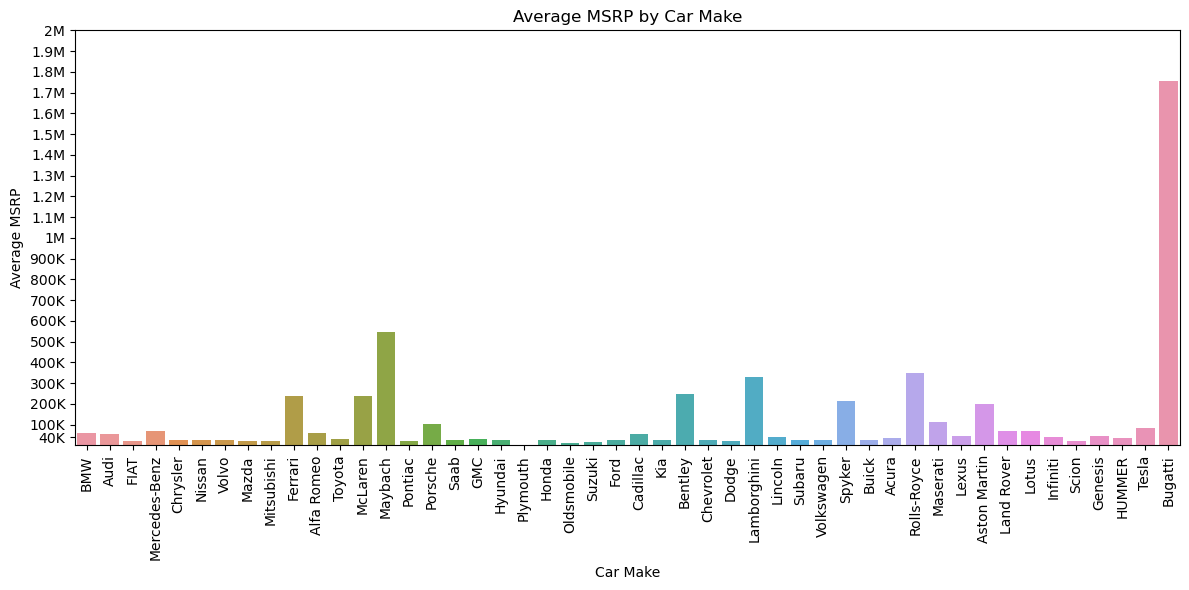

In [211]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Make', y='MSRP', errorbar=None)  # ci=None removes error bars
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Average MSRP')
plt.title('Average MSRP by Car Make')

tick_values = [40000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000]
tick_labels = ['40K', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K', '900K', '1M', '1.1M', '1.2M', '1.3M', '1.4M', '1.5M', '1.6M', '1.7M', '1.8M', '1.9M', '2M']
plt.yticks(tick_values, tick_labels)

plt.tight_layout()
plt.show()

In [277]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.impute import SimpleImputer


In [213]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [335]:
cat_features = ['Make', 'Model','Engine Fuel Type',
            'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
categorical_transformer = Pipeline(steps=[
                            ("onehot", OneHotEncoder(handle_unknown="ignore"))])
cat_features = ['Make', 'Model','Engine Fuel Type',
            'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']

ordinal_cat = ['Year']
ordinal_transformer = Pipeline(steps=[
                            ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))])

num_features = ['Engine HP', 'Engine Cylinders', 'Number of Doors']

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

col_transformer = ColumnTransformer(
                        transformers=[
                            ('cat', categorical_transformer, cat_features),
                            ('cat_ordinal', ordinal_transformer, ordinal_cat),
                            ('num', numerical_transformer, num_features)
                        ],
                        remainder='passthrough')
models = [
    ("LinearRegression", LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet())
]


pipelines = []
model_scores = []


X = df.drop('MSRP', axis=1)
y = df['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model_instance in models:
    model_pipeline = Pipeline([
        ('transformer', col_transformer),
        ('model', model_instance)
    ])
    pipelines.append((model_name, model_pipeline))

for model_name, model_pipeline in pipelines:
    print(f"Training {model_name}...")
    model_pipeline.fit(X_train, y_train)
    score = model_pipeline.score(X_test, y_test)
    print(f"Score for {model_name}: {score}")
    model_scores.append((model_name,score ))

Training LinearRegression...
Score for LinearRegression: 0.9340606413267765
Training Ridge...
Score for Ridge: 0.9288873073136812
Training Lasso...


C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126250929131.09317, tolerance: 3736076211.4287863
  model = cd_fast.sparse_enet_coordinate_descent(


Score for Lasso: 0.953404483053089
Training ElasticNet...
Score for ElasticNet: 0.6026317713977467


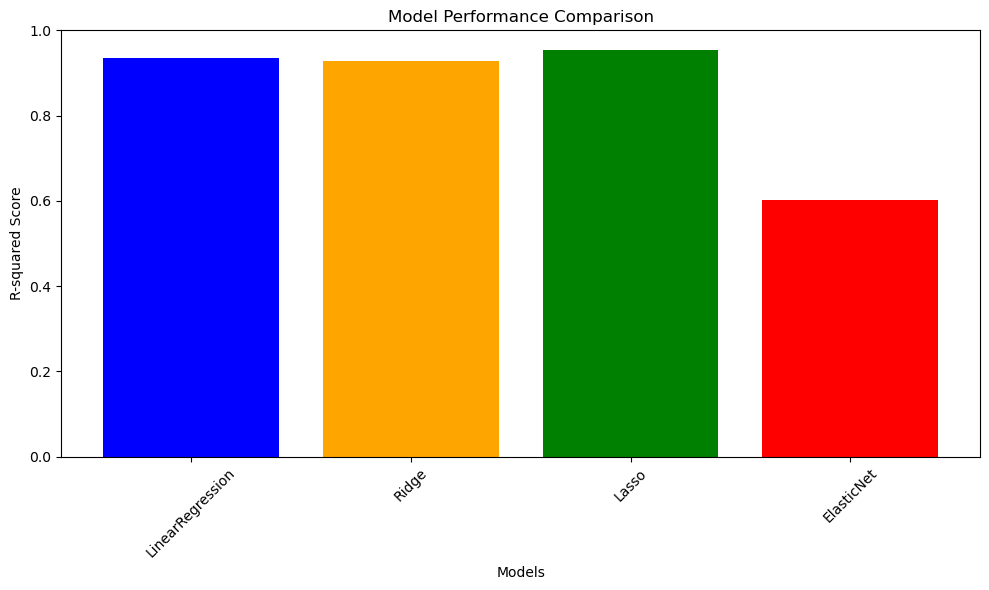

In [286]:
model_names, scores = zip(*model_scores)

plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limits
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [324]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'Ridge__alpha': np.arange(1, 5, 0.1),
    'Ridge__max_iter': [1000, 5000]
}

ridge_pipeline = Pipeline([
    ('transformer', col_transformer),
    ('Ridge', Ridge())  # Use Ridge or any other model
])

gs = GridSearchCV(ridge_pipeline, param_grid=param_grid)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Model',
                                                                          'Engine '
                                                                          'Fuel '
                                                                          'Type',
                                                                          'Transmission '
                                                                          'Type',
                                                                          'Driven_Wheels',
                                                                          'Vehicle '
                                                                          'Size',
                                                                          'Vehicle '
                                                                          'Style']),
                                                                        ('cat_ordinal',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Engine '
                                                                          'HP',
                                                                          'Engine '
                                                                          'Cylinders',
                                                                          'Number '
                                                                          'of '
                                                                          'Doors'])])),
                                       ('Ridge', Ridge())]),
             param_grid={'Ridge__alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9]),
                         'Ridge__max_iter': [1000, 5000]})

In [325]:
best_params = gs.best_params_
best_params

{'Ridge__alpha': 1.0, 'Ridge__max_iter': 1000}

In [333]:
best_alpha = best_params['Ridge__alpha']
best_max_iter = best_params['Ridge__max_iter']

# Create a new Ridge instance with the best parameters
best_ridge_model = Ridge()

best_ridge_pipeline = Pipeline([
    ('transformer', col_transformer),  # Existing transformer pipeline
    ('model', best_ridge_model)         # Use the best Ridge model
])

# Train the new pipeline with the best Ridge model and transformers
best_ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Model',
                                                   'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Year']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Engine HP',
                                                   'Engine Cylinders',
                                                   'Number of Doors'])])),
                ('model', Ridge())])

In [334]:
best_ridge_pipeline.score(X_test, y_test)

0.9288873073136812

In [332]:
.934060641326776

0.934060641326776

In [346]:
lasso_model = pipelines[2][1].named_steps['model']  # Extract the Lasso model
lasso_coefficients = lasso_model.coef_

In [348]:
important_feature_indices = np.where(lasso_coefficients != 0)[0]
important_features = [feature_names[i] for i in important_feature_indices]

IndexError: list index out of range

In [349]:
elastic_model = pipelines[3][1]
elastic_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Model',
                                                   'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Year']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Engine HP',
                                                   'Engine Cylinders',
                                                   'Number of Doors'])])),
                ('model', ElasticNet())])

In [354]:
elastic_param_grid = {
                'model__alpha': np.arange(0.5, 2, 0.2),
                'model__l1_ratio': np.arange(1, 2, 0.2),
                'model__max_iter': [2000, 5000, 7000] 
}

elastic_gs = GridSearchCV(elastic_model, elastic_param_grid)
elastic_gs.fit(X_train, y_train)

C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75662763350.79819, tolerance: 3290155529.3534737
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29135592507.62863, tolerance: 2952519416.966504
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26343667368.024353, tolerance: 2999662137.1849437
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\model_selection\_valid

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Model',
                                                                          'Engine '
                                                                          'Fuel '
                                                                          'Type',
                                                                          'Transmission '
                                                                          'Type',
                                                                          'Driven_Wheels',
                                                                          'Vehicle '
                                                                          'Size',
                                                                          'Vehicle '
                                                                          'Style']),
                                                                        ('cat_ordinal',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder...ue',
                                                                                                         unknown_value=-1))]),
                                                                         ['Year']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Engine '
                                                                          'HP',
                                                                          'Engine '
                                                                          'Cylinders',
                                                                          'Number '
                                                                          'of '
                                                                          'Doors'])])),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'model__l1_ratio': array([1. , 1.2, 1.4, 1.6, 1.8]),
                         'model__max_iter': [2000, 5000, 7000]})

In [ ]:
elastic_gss.best_params_